<a href="https://colab.research.google.com/github/djdongjae/DataAnalysis/blob/main/8%EC%9E%A5_%EC%8B%A4%EC%8A%B5%EC%98%88%EC%A0%9C_%EC%98%A4%EB%8F%99%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [08-2] 산점도 - 변수 간 관계 표현하기

In [1]:
#산점도 만들기
import pandas as pd
mpg = pd.read_csv('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/mpg.csv')

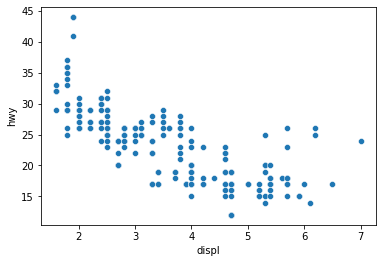

In [2]:
#x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns 
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

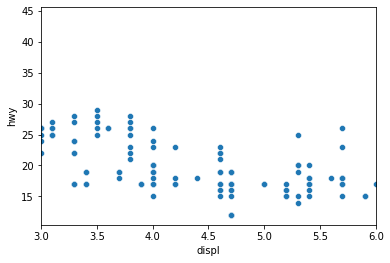

In [3]:
#x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3, 6))

[(10.0, 30.0), (3.0, 6.0)]

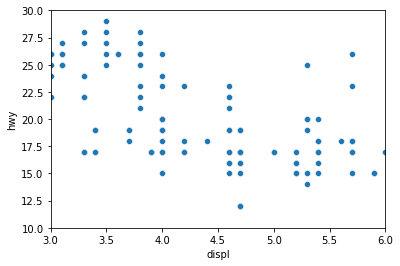

In [4]:
#x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3, 6), ylim = (10, 30))

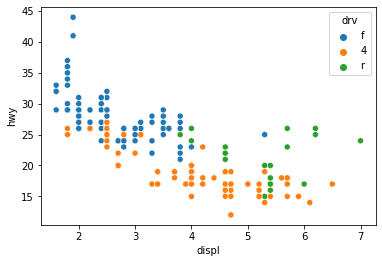

In [5]:
#drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

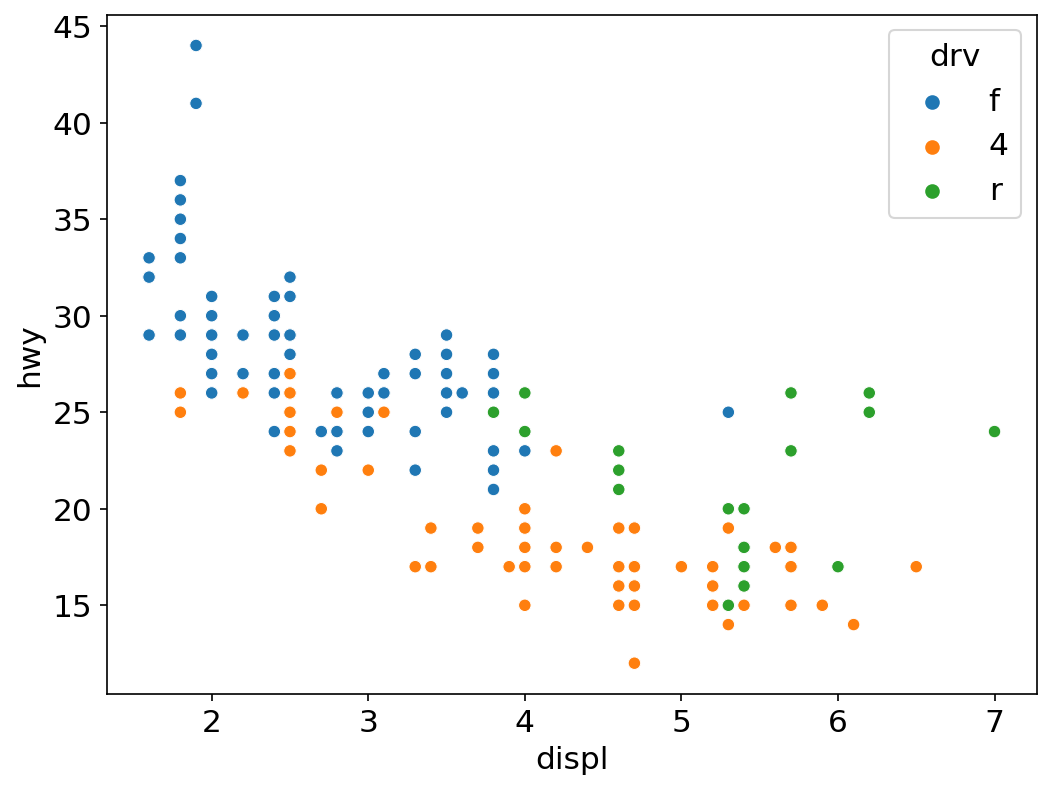

In [6]:
#그래프 설정 바꾸기
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '150',
                     'figure.figsize' : [8, 6],
                     'font.size' : '15',
                     'font.family' : 'Malgun Gothic'})
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

In [7]:
#설정 되돌리기
plt.rcParams.update(plt.rcParamsDefault)

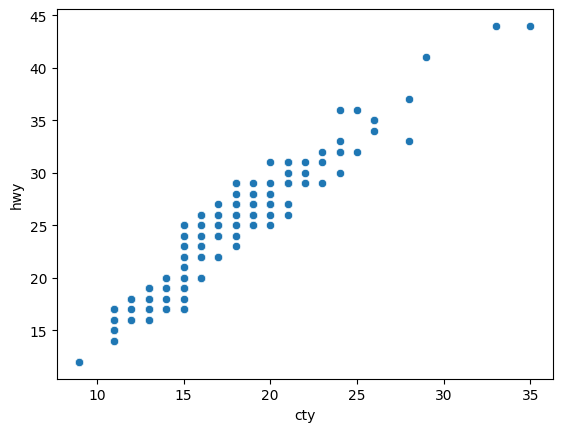

In [8]:
#혼자서 해보기 Q1
#mpg데이터의 cty(도시 연비)와 hwy(고속도로 연비)간에 어떤관계가 있는지 알아보려고 합니다.
#x축은 cty, y축은 hwy로 된 산점도를 만들어보세요.
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

[(0.0, 10000.0), (0.0, 500000.0)]

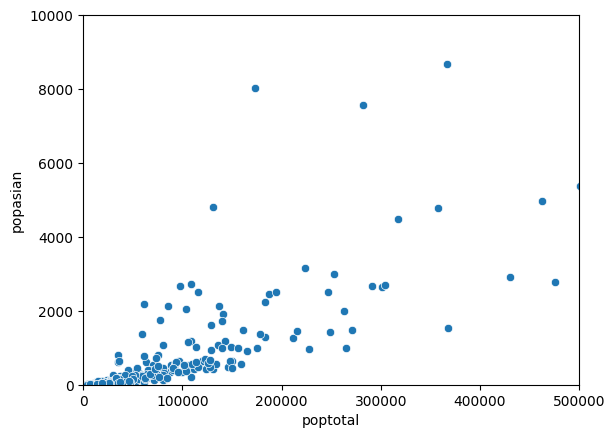

In [9]:
#혼자서 해보기 Q2
#미국의 지역별 인구통계를 담은 midwest.csv를 이용해 전체인구와 아시아인 인구 간에 어떤 관계가 있는지 알아보려고 합니다.
#x축은 poptotal(전체 인구), y축은 popasian(아시아인 인구)으로 된 산점도를 만들어보세요.
#전체 인구는 50만명 이하, 아시아인 인구는 1만 명 이하인 지역만 산점도에 표시되게 설정하세요.
midwest = pd.read_csv('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/midwest.csv')
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian')\
.set(xlim = (0, 500000), ylim = (0, 10000))

# [08-3] 막대그래프 - 집단 간 차이 표현하기

(1) 평균 막대 그래프 만들기

In [10]:
#drv별 평균 구하기
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

In [11]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))

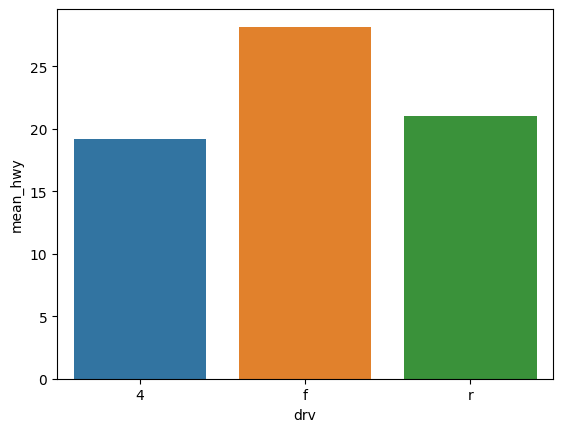

In [12]:
#drv별 hwy평균 막대그래프
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

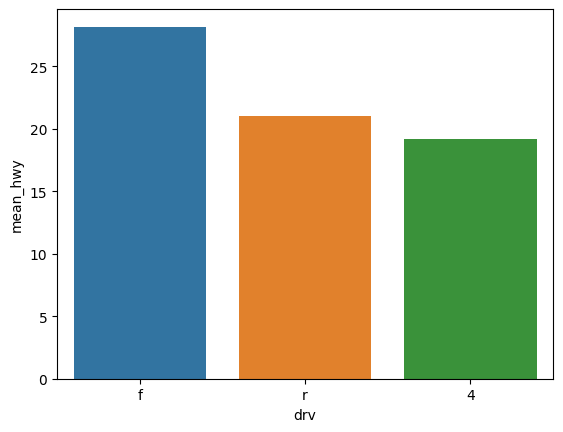

In [13]:
#크기순으로 정렬하기
#데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
#막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

(2) 빈도 막대 그래프 만들기

In [14]:
#집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


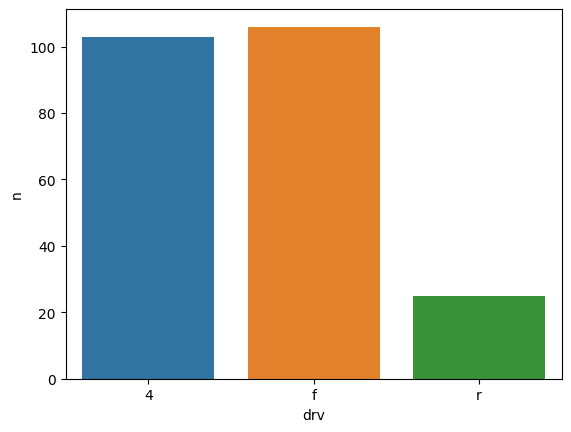

In [15]:
#그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

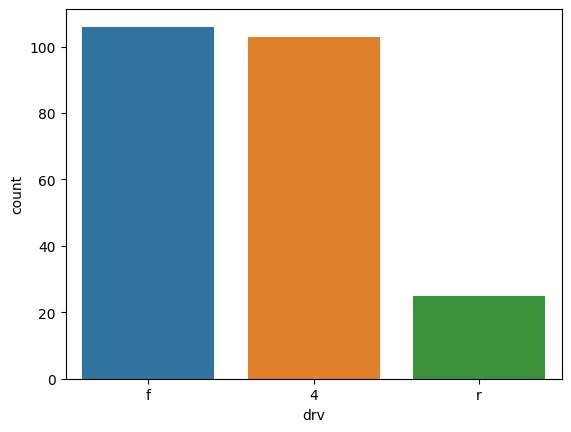

In [16]:
#sns.countplot()으로 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

In [17]:
print(mpg['drv'].unique())
print(df_mpg['drv'].unique())

['f' '4' 'r']
['4' 'f' 'r']


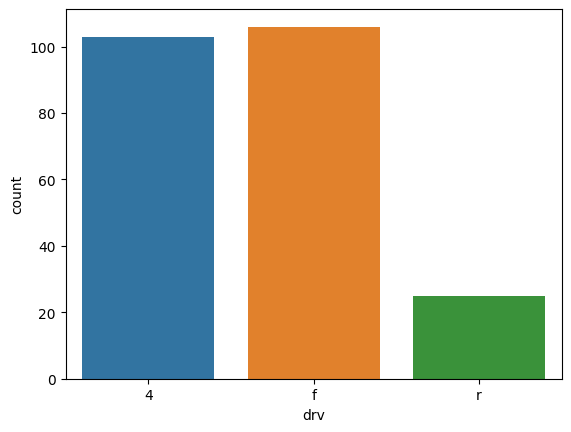

In [18]:
#막대 정렬하기
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [19]:
#drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

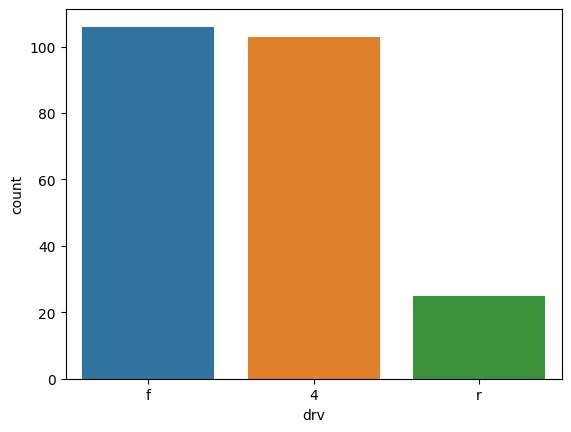

In [20]:
#drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

<혼자서 해보기>

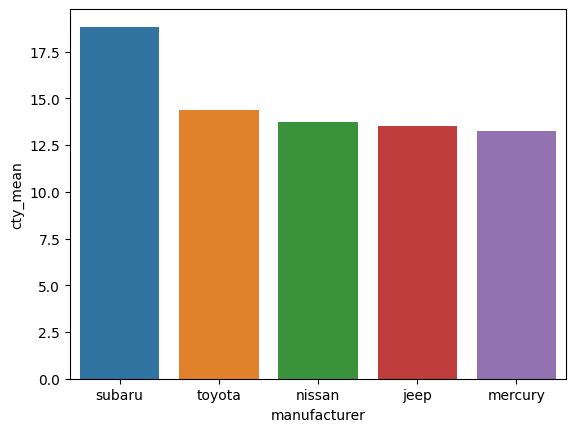

In [21]:
#혼자서 해보기 Q1 
#어떤 회사에서 생산한 'suv'차종의 도시 연비가 높은지 알아보려고 합니다.
#'suv'차종을 대상으로 cty(도시연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요.
#막대는 연비가 높은 순으로 정렬하세요.
df_mpg = mpg.query('category == "suv"').groupby('manufacturer', as_index = False).agg(cty_mean = ('cty', 'mean')).sort_values('cty_mean', ascending = False)
sns.barplot(data = df_mpg.head(5), x = 'manufacturer', y = 'cty_mean')

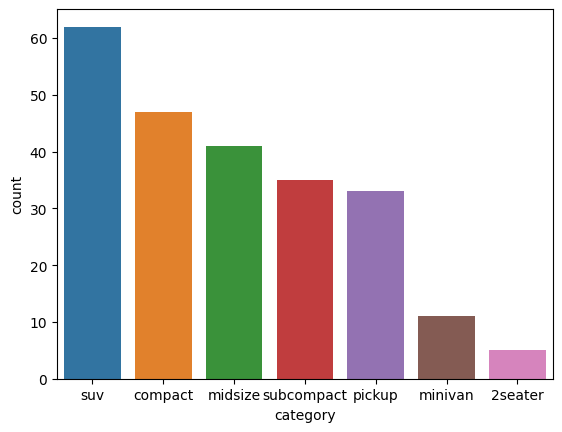

In [22]:
#혼자서 해보기 Q2
#자동차 중에 어떤 category(자동차 종류)가 많은지 알아보려고 합니다.
#sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요.
#막대는 빈도가 높은 순으로 정렬하세요.
sns.countplot(data = mpg, x = 'category', order = mpg['category'].value_counts().index)

# [08-4] 선그래프 - 시간에 따라 달라지는 데이터 표현하기

(1) 시계열 그래프 만들기

In [23]:
#economics 데이터 불러오기
economics = pd.read_csv('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


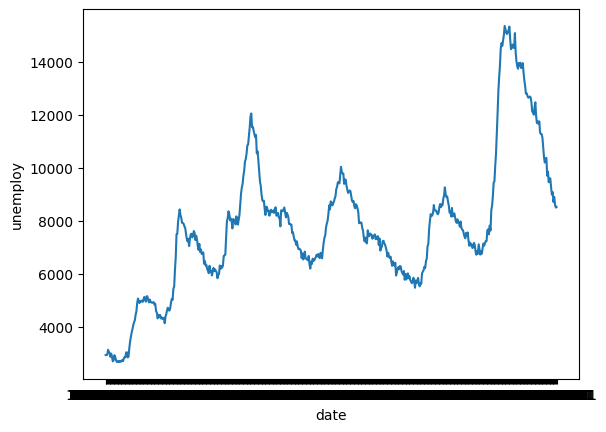

In [24]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [25]:
#x축에 연도 표시하기

#1. 날짜 시간 타입 변수 만들기

economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [26]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [27]:
#연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [28]:
#월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [29]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [30]:
#(2) 연도 변수 만들기

#연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


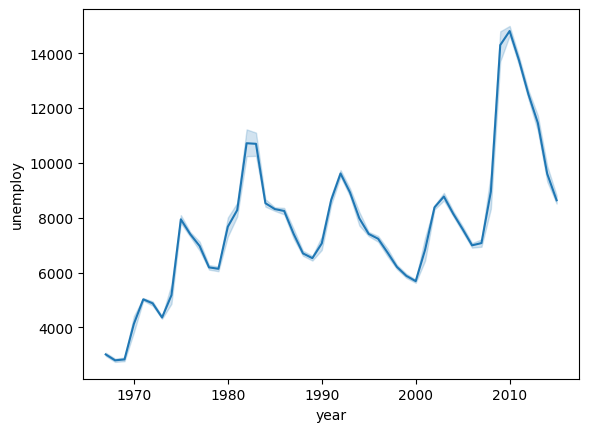

In [31]:
#(3) x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

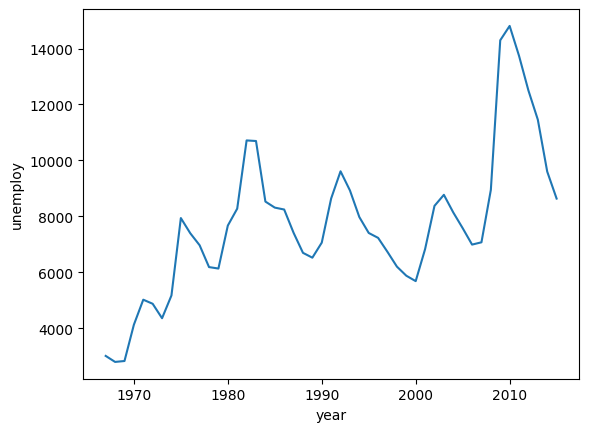

In [32]:
#신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

<혼자서 해보기>

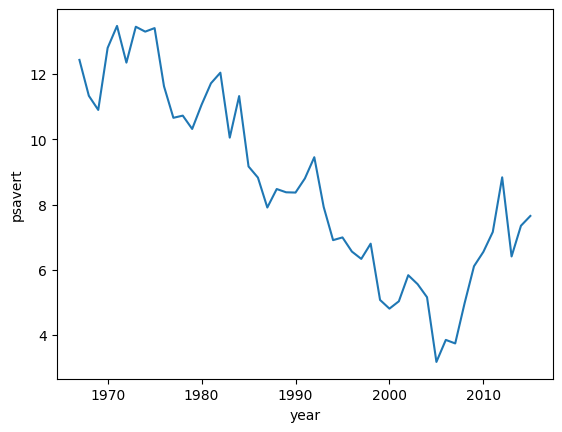

In [33]:
#Q1
#psavert(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보려고 합니다.
#연도별 개인 저축률의 변화를 나타낸 시계열 그래프를 만들어 보세요.
sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None)

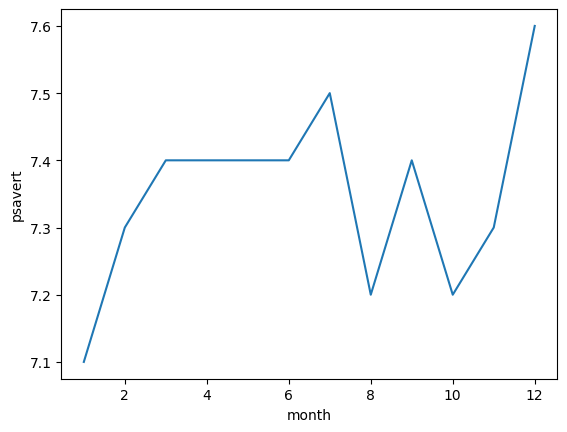

In [34]:
#Q2
#2014년 월별 psavert의 변화를 나타낸 시계열 그래프를 만들어 보세요.
df_economics = economics.query('year == 2014')
economics['month'] = df_economics['date2'].dt.month
sns.lineplot(data = economics, x = 'month', y = 'psavert', ci = None)

# [08-5] 상자그림 - 집단 간 분포 차이 표현하기

(1) 상자 그림 만들기

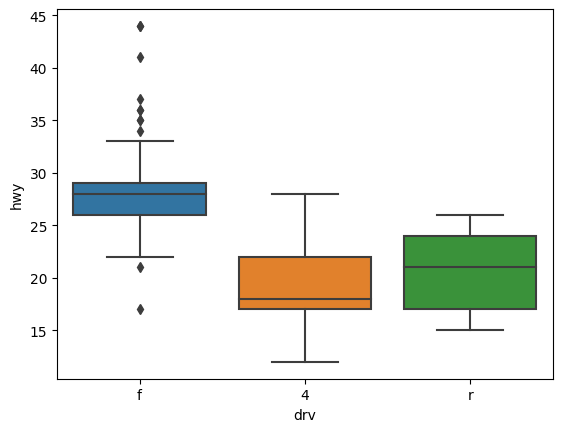

In [36]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

(2) 혼자서 해보기

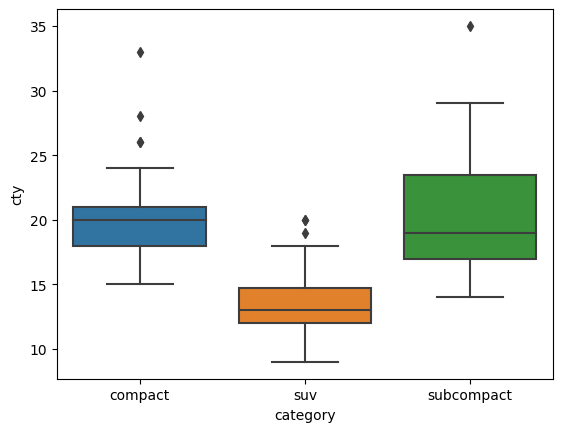

In [35]:
#Q1
#category(자동차 종류)가 'compact', 'subcompact', 'suv'인 자동차의 cty(도시 연비)가 어떻게 다른지 비교해 보려고 합니다.
#세 차종의 cty를 나타낸 상자 그림을 만들어보세요.
df_mpg = mpg.query('category in ["compact", "subcompact", "suv"]')
sns.boxplot(data = df_mpg, x = 'category', y = 'cty')